<a href="https://colab.research.google.com/github/vit050587/Data-analysis/blob/master/analytics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Урок 1

## Задание 1

Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
X.shape

(2, 10)

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
y

[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [ ]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

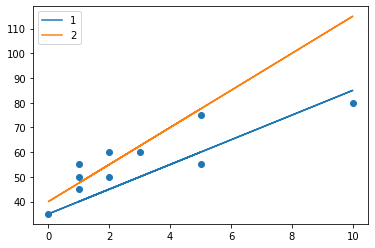

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [ ]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [ ]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [ ]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [ ]:
X.shape

(2, 10)

In [ ]:
X.T.shape

(10, 2)

In [ ]:
all(X @ y == np.dot(X,y))

True

In [ ]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [ ]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

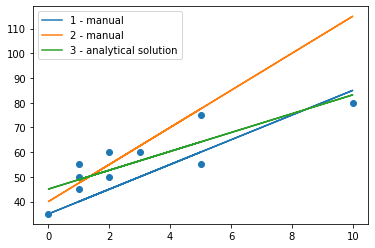

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [ ]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [ ]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [ ]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [ ]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [ ]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha
for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


In [ ]:
def grad_desc(X, y, alpha=1e-2, verbose=False, tol=0.0):
    '''

    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    '''
    n = X.shape[1]
    W = np.array([1, 0.5])  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        for k in range(W.shape[0]):
            W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [ ]:
W_1, mse_1 = grad_desc(X, y, alpha=1e-04, verbose=True)
W_1, mse_1

100 [1.97010092 3.67378143] 1944.8452682906711
200 [2.76244709 5.88706008] 1383.8027863932552
300 [3.42872258 7.42467711] 1098.8234965614354
400 [4.0053031  8.48705476] 950.6535374478393
500 [4.51779281 9.2152153 ] 870.345877329022
600 [4.98421653 9.70838516] 823.7624840221564
700 [ 5.41726595 10.03638183] 793.9993254009962
800 [ 5.82588008 10.24832966] 772.6849749885797
900 [ 6.21635738 10.37879268] 755.6725451966589
1000 [ 6.59313819 10.45208971] 740.9067599479888
1100 [ 6.9593554 10.4853308] 727.3679402320597
1200 [ 7.31722181 10.49055361] 714.5491699660842
1300 [ 7.66830276 10.47622675] 702.1974397838843
1400 [ 8.01370793 10.4483075 ] 690.1854864806835
1500 [ 8.35422633 10.41098615] 678.4483399742064
1600 [ 8.69042121 10.36720964] 666.951907011117
1700 [ 9.02269695 10.31905009] 655.6774162986715
1800 [ 9.35134605 10.26796406] 644.6137166498725
1900 [ 9.67658219 10.21497502] 633.7534631720864
2000 [ 9.99856357 10.16080168] 623.0912284396718
2100 [10.31740922 10.10594836] 612.6225667

(array([45.06248117,  3.81250341]), 43.96875000016706)

при  α=0.06  максимально приблизились к минимуму за  287  итераций.

Визуализируем на графике:

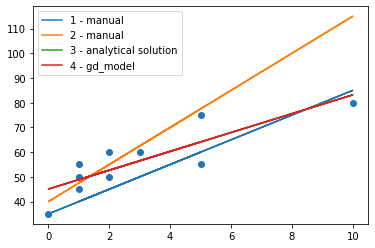

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.plot(X[1], W_1[0] + W_1[1] * X[1], label='4 - gd_model')
plt.legend()
plt.show()

## Задание 2*

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
w = np.array([1, 0.5])
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    if i % 100 == 0:
        print(i, w, err)

NameError: ignored

In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

NameError: ignored

## Задание 3*

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?

# Урок 2

## Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

## Задание 2

Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

# Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

# Урок 3

## Задание 1

 Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

## Задание 2

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

## Задание 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

## Задание 4

Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

## Задание 5

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

## Задание 6

Могла ли модель переобучиться? Почему?

# Урок 4

## Задание 1

В коде из методички реализуйте один или несколько критериев останова: минимальное количество объектов в листе (min_leaf), максимальная глубина дерева, максимальное количество листьев и т.д. Добавьте эти критерии в параметры функции build_tree и проверьте ее работоспособность с помощью визуализации дерева (функция print_tree).